# Figure 3


In [1]:
# Load in packages
library(tidyverse)
library(data.table)
library(readxl)
library(dplyr)
library(stringr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
#Clear environment: 
rm(list=ls())

# Set your datasets below and read in the files containing all indels ≤ 50bp for each dataset:

In [3]:

## define dfs 
df_name_1 = "gnomAD"
df_name_2 = "IGM"
df_name_3 = "UK.BB"

## Read in dataframe (total)
df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_lt50bp.csv", header = TRUE )
df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_lt50bp.csv", header = TRUE )
df_3 = fread("UK.BB.exomes.430k.sites_indelsonly_rAF_lt50bp.csv", header = TRUE )


# Read in rAF_hi indels file for each dataset: 

In [4]:

rAF_hi_bp_10_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp10_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_20_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp20_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_30_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp30_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_40_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp40_rAF_hiIndels.lt50bp.csv", header = TRUE)

rAF_hi_bp_10_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp10_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_20_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp20_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_30_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp30_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_40_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp40_rAF_hiIndels.lt50bp.csv", header = TRUE)

rAF_hi_bp_10_df_3 = fread("UK.BB.exomes.430k.sites_indelsonly_rAF_bp10_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_20_df_3 = fread("UK.BB.exomes.430k.sites_indelsonly_rAF_bp20_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_30_df_3 = fread("UK.BB.exomes.430k.sites_indelsonly_rAF_bp30_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_40_df_3 = fread("UK.BB.exomes.430k.sites_indelsonly_rAF_bp40_rAF_hiIndels.lt50bp.csv", header = TRUE)


In [5]:
#Declare your bp range:

bp_range = c("10", "20", "30", "40")

In [6]:
#Define your sAF_lo threshold:
sAF_lo = (1 * 10^-4)

# Find the total number of indels that are sAF_lo by sAF 

In [7]:
tot_sAF_lo_sAF_df1 = nrow(df_1 %>% filter(sAF <= sAF_lo))
tot_sAF_lo_sAF_df2 = nrow(df_2 %>% filter(sAF <= sAF_lo))
tot_sAF_lo_sAF_df3 = nrow(df_3 %>% filter(sAF <= sAF_lo))


# Calculate the number and percentages of the sAF_lo sAF indels that are also sAF_lo by rAF for each bp window and also calculate the number and percentages of the sAF_lo sAF indels that are rAF_hi (sAF_hi by rAF for each bp window) 

In [9]:

for (i in bp_range) {
  # call that var
  temp_df_1 = paste0("rAF_hi_bp_", i, "_df_1")
  temp_df_2 = paste0("rAF_hi_bp_", i, "_df_2")
  temp_df_3 = paste0("rAF_hi_bp_", i, "_df_3")
  
  ## calculate the number of rAF_hi indels 
  num_df_1 = paste0("num_rAF_hi_bp_", i , "_df_1")
  assign(num_df_1, nrow(get(temp_df_1)))

  num_df_2 = paste0("num_rAF_hi_bp_", i , "_df_2")
  assign(num_df_2, nrow(get(temp_df_2)))

  num_df_3 = paste0("num_rAF_hi_bp_", i , "_df_3")
  assign(num_df_3, nrow(get(temp_df_3)))
  
  # get the number of rAF_lo indels 
  rAF_lo_df_1 = paste0("num_rAF_lo_bp_", i , "_df_1")
  assign(rAF_lo_df_1, (tot_sAF_lo_sAF_df1 - nrow(get(temp_df_1))))

  rAF_lo_df_2 = paste0("num_rAF_lo_bp_", i , "_df_2")
  assign(rAF_lo_df_2, (tot_sAF_lo_sAF_df2 - nrow(get(temp_df_2))))


  rAF_lo_df_3 = paste0("num_rAF_lo_bp_", i , "_df_3")
  assign(rAF_lo_df_3, (tot_sAF_lo_sAF_df3 - nrow(get(temp_df_3))))
  
  
  ## calculate the percentage and save in dynamic variable 
  percent_df_1 = paste0("percent_rAF_hi_bp_", i, "_df_1")
  assign(percent_df_1, paste0(round(((get(num_df_1) / tot_sAF_lo_sAF_df1) * 100 ),0), "%"))

  percent_df_2 = paste0("percent_rAF_hi_bp_", i, "_df_2")
  assign(percent_df_2, paste0(round(((get(num_df_2) / tot_sAF_lo_sAF_df2) * 100 ),0), "%"))
  
  percent_df_3 = paste0("percent_rAF_hi_bp_", i, "_df_3")
  assign(percent_df_3, paste0(round(((get(num_df_3) / tot_sAF_lo_sAF_df3) * 100 ),0), "%"))
  
  ## find the percentage of the sAF_lo sAF/rAF_lo rAF genes 
  percent_diff_df_1 = paste0("percent_rAF_lo_bp_", i, "_df_1")
  assign(percent_diff_df_1, paste0(round(((get(rAF_lo_df_1) / tot_sAF_lo_sAF_df1) * 100 ),0), "%"))
  
  percent_diff_df_2 = paste0("percent_rAF_lo_bp_", i, "_df_2")
  assign(percent_diff_df_2, paste0(round(((get(rAF_lo_df_2) / tot_sAF_lo_sAF_df2) * 100 ),0), "%"))

  percent_diff_df_3 = paste0("percent_rAF_lo_bp_", i, "_df_3")
  assign(percent_diff_df_3, paste0(round(((get(rAF_lo_df_3) / tot_sAF_lo_sAF_df3) * 100 ),0), "%")) 
}

# Make dataframe for graph 

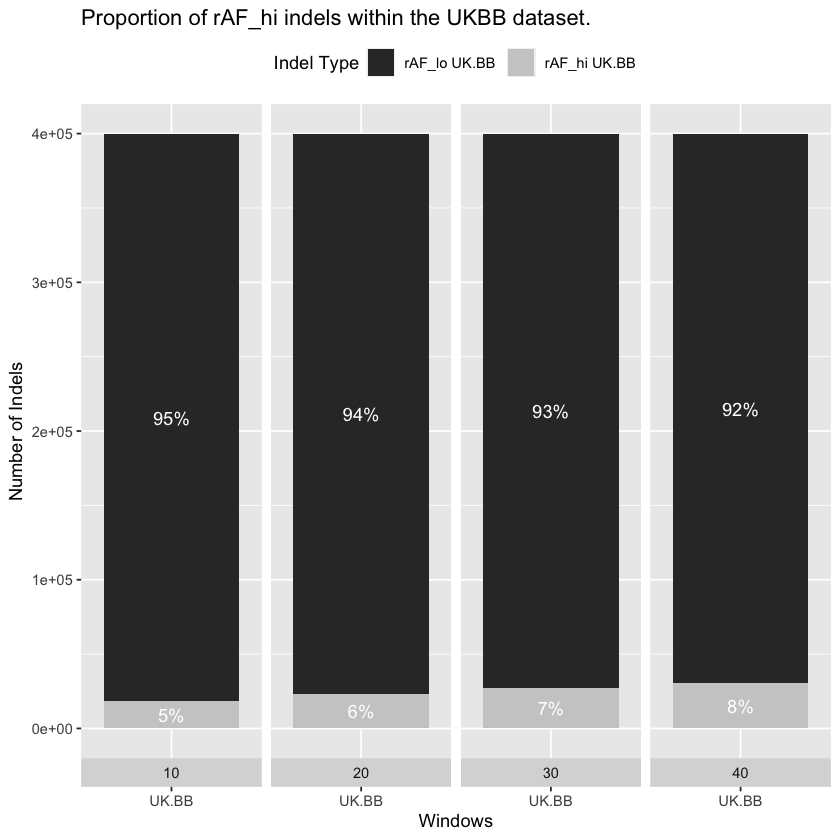

In [11]:
windows = c(rep(bp_range, 2))
condition = c(rep("rAF_lo", 4), rep("rAF_hi", 4))


num_indels = c(num_rAF_hi_bp_10_df_1, num_rAF_hi_bp_20_df_1, num_rAF_hi_bp_30_df_1, num_rAF_hi_bp_40_df_1, num_rAF_lo_bp_10_df_1, num_rAF_lo_bp_20_df_1, num_rAF_lo_bp_30_df_1, num_rAF_lo_bp_40_df_1, num_rAF_hi_bp_10_df_2, num_rAF_hi_bp_20_df_2, num_rAF_hi_bp_30_df_2, num_rAF_hi_bp_40_df_2, num_rAF_lo_bp_10_df_2, num_rAF_lo_bp_20_df_2, num_rAF_lo_bp_30_df_2, num_rAF_lo_bp_40_df_2, num_rAF_hi_bp_10_df_3, num_rAF_hi_bp_20_df_3, num_rAF_hi_bp_30_df_3, num_rAF_hi_bp_40_df_3, num_rAF_lo_bp_10_df_3, num_rAF_lo_bp_20_df_3, num_rAF_lo_bp_30_df_3, num_rAF_lo_bp_40_df_3)


perct_indels = c(percent_rAF_hi_bp_10_df_1, percent_rAF_hi_bp_20_df_1, percent_rAF_hi_bp_30_df_1, percent_rAF_hi_bp_40_df_1, percent_rAF_lo_bp_10_df_1, percent_rAF_lo_bp_20_df_1, percent_rAF_lo_bp_30_df_1, percent_rAF_lo_bp_40_df_1, percent_rAF_hi_bp_10_df_2, percent_rAF_hi_bp_20_df_2, percent_rAF_hi_bp_30_df_2, percent_rAF_hi_bp_40_df_2, percent_rAF_lo_bp_10_df_2, percent_rAF_lo_bp_20_df_2, percent_rAF_lo_bp_30_df_2, percent_rAF_lo_bp_40_df_2, percent_rAF_hi_bp_10_df_3, percent_rAF_hi_bp_20_df_3, percent_rAF_hi_bp_30_df_3, percent_rAF_hi_bp_40_df_3, percent_rAF_lo_bp_10_df_3, percent_rAF_lo_bp_20_df_3, percent_rAF_lo_bp_30_df_3, percent_rAF_lo_bp_40_df_3 )

df_labels = c(rep(df_name_1, 8), rep(df_name_2, 8),rep(df_name_3, 8))


graph_df = data.frame(windows, condition, num_indels, perct_indels, df_labels)

#Make graph 

ggplot(graph_df, aes(x = df_labels, y = num_indels, fill = interaction(condition, df_labels))) + geom_bar(stat = "identity", position = "stack") + facet_grid(~windows, switch = "both")  +  theme(legend.position = "top") + labs(title = "Proportion of rAF_hi Indels Within the GnomAD, IGM, and UKBB Datasets.", y = "Number of Indels", x = "Windows", fill = "Indel Type") +  geom_text(aes(label = perct_indels), color = "white", position = position_stack(vjust = 0.5)) + scale_fill_grey(labels = c(paste0("rAF_lo ", df_name_1), paste0 ("rAF_hi ", df_name_1), paste0("rAF_lo ", df_name_2), paste0 ("rAF_hi ", df_name_2), paste0("rAF_lo ", df_name_3), paste0 ("rAF_hi ", df_name_3)))




In [12]:
for (i in bp_range) {
  num_df1 = paste0("num_rAF_hi_bp_", i , "_df_1")
  num_df2 = paste0("num_rAF_hi_bp_", i , "_df_2")
  num_df3 = paste0("num_rAF_hi_bp_", i , "_df_3")
  
  prct_df1 = paste0("percent_rAF_hi_bp_", i, "_df_1")
  prct_df2 = paste0("percent_rAF_hi_bp_", i, "_df_2")
  prct_df3 = paste0("percent_rAF_hi_bp_", i, "_df_3")
  
  print (paste0("In the dataframe ", df_name_1, " there are ", get(num_df1), " rAF_hi indels in the ",i,"bp sliding window."))
  print (paste0("In the dataframe ", df_name_1, " rAF_hi indels account for ", get(prct_df1), " percent in the ",i,"bp sliding window."))


  print (paste0("In the dataframe ", df_name_2, " there are ", get(num_df2), " rAF_hi indels in the ",i,"bp sliding window."))
  print (paste0("In the dataframe ", df_name_2, " rAF_hi indels account for ", get(prct_df2), " percent in the ",i,"bp sliding window."))
  
  print (paste0("In the dataframe ", df_name_3, " there are ", get(num_df3), " rAF_hi indels in the ",i,"bp sliding window."))
  print (paste0("In the dataframe ", df_name_3, " rAF_hi indels account for ", get(prct_df3), " percent in the ",i,"bp sliding window."))
}

graph_df

[1] "In the dataframe UK.BB there are 18121 rAF_hi indels in the 10bp sliding window."
[1] "In the dataframe UK.BB rAF_hi indels account for 5% percent in the 10bp sliding window."
[1] "In the dataframe UK.BB there are 22943 rAF_hi indels in the 20bp sliding window."
[1] "In the dataframe UK.BB rAF_hi indels account for 6% percent in the 20bp sliding window."
[1] "In the dataframe UK.BB there are 27045 rAF_hi indels in the 30bp sliding window."
[1] "In the dataframe UK.BB rAF_hi indels account for 7% percent in the 30bp sliding window."
[1] "In the dataframe UK.BB there are 30249 rAF_hi indels in the 40bp sliding window."
[1] "In the dataframe UK.BB rAF_hi indels account for 8% percent in the 40bp sliding window."


windows,condition,num_indels,perct_indels,df_labels
<chr>,<chr>,<int>,<chr>,<chr>
10,rAF_lo,18121,5%,UK.BB
20,rAF_lo,22943,6%,UK.BB
30,rAF_lo,27045,7%,UK.BB
40,rAF_lo,30249,8%,UK.BB
10,rAF_hi,381723,95%,UK.BB
20,rAF_hi,376901,94%,UK.BB
30,rAF_hi,372799,93%,UK.BB
40,rAF_hi,369595,92%,UK.BB


# Make Supplementary Tables S5, S6, and S7. 

In [15]:
sAF_lo_df1 = c(rep(tot_sAF_lo_sAF_df1,4))
rAF_hi_df1 = c(num_rAF_hi_bp_10_df_1, num_rAF_hi_bp_20_df_1, num_rAF_hi_bp_30_df_1, num_rAF_hi_bp_40_df_1)
rAF_hi_prct_df1 = c(percent_rAF_hi_bp_10_df_1, percent_rAF_hi_bp_20_df_1, percent_rAF_hi_bp_30_df_1, percent_rAF_hi_bp_40_df_1)
rAF_lo_raf_df1 = c(num_rAF_lo_bp_10_df_1, num_rAF_lo_bp_20_df_1, num_rAF_lo_bp_30_df_1, num_rAF_lo_bp_40_df_1)
rAF_lo_raf_prct_df1 = c(percent_rAF_lo_bp_10_df_1, percent_rAF_lo_bp_20_df_1, percent_rAF_lo_bp_30_df_1, percent_rAF_lo_bp_40_df_1)

TableS5 = data.frame(bp_range, sAF_lo_df1, rAF_hi_df1, rAF_hi_prct_df1, rAF_lo_raf_df1, rAF_lo_raf_prct_df1)
TableS5

sAF_lo_df2 = c(rep(tot_sAF_lo_sAF_df2,4))
rAF_hi_df2 = c(num_rAF_hi_bp_10_df_2, num_rAF_hi_bp_20_df_2, num_rAF_hi_bp_30_df_2, num_rAF_hi_bp_40_df_2)
rAF_hi_prct_df2 = c(percent_rAF_hi_bp_10_df_2, percent_rAF_hi_bp_20_df_2, percent_rAF_hi_bp_30_df_2, percent_rAF_hi_bp_40_df_2)
rAF_lo_raf_df2 = c(num_rAF_lo_bp_10_df_2, num_rAF_lo_bp_20_df_2, num_rAF_lo_bp_30_df_2, num_rAF_lo_bp_40_df_2)
rAF_lo_raf_prct_df2 = c(percent_rAF_lo_bp_10_df_2, percent_rAF_lo_bp_20_df_2, percent_rAF_lo_bp_30_df_2, percent_rAF_lo_bp_40_df_2)

TableS6 = data.frame(bp_range, sAF_lo_df2, rAF_hi_df2, rAF_hi_prct_df2, rAF_lo_raf_df2, rAF_lo_raf_prct_df2)
TableS6

sAF_lo_df3 = c(rep(tot_sAF_lo_sAF_df3,4))
rAF_hi_df3 = c(num_rAF_hi_bp_10_df_3, num_rAF_hi_bp_20_df_3, num_rAF_hi_bp_30_df_3, num_rAF_hi_bp_40_df_3)
rAF_hi_prct_df3 = c(percent_rAF_hi_bp_10_df_3, percent_rAF_hi_bp_20_df_3, percent_rAF_hi_bp_30_df_3, percent_rAF_hi_bp_40_df_3)
rAF_lo_raf_df3 = c(num_rAF_lo_bp_10_df_3, num_rAF_lo_bp_20_df_3, num_rAF_lo_bp_30_df_3, num_rAF_lo_bp_40_df_3)
rAF_lo_raf_prct_df3 = c(percent_rAF_lo_bp_10_df_3, percent_rAF_lo_bp_20_df_3, percent_rAF_lo_bp_30_df_3, percent_rAF_lo_bp_40_df_3)

TableS7 = data.frame(bp_range, sAF_lo_df3, rAF_hi_df3, rAF_hi_prct_df3, rAF_lo_raf_df3, rAF_lo_raf_prct_df3)
fwrite(TableS7, "TableS5_UKBB.csv")

In [16]:
TableS7

bp_range,sAF_lo_df3,rAF_hi_df3,rAF_hi_prct_df3,rAF_lo_raf_df3,rAF_lo_raf_prct_df3
<chr>,<int>,<int>,<chr>,<int>,<chr>
10,399844,18121,5%,381723,95%
20,399844,22943,6%,376901,94%
30,399844,27045,7%,372799,93%
40,399844,30249,8%,369595,92%
